# <span style="color:#1c3a6b"> EDA TO FIND FACTORS AFFECTING A COUNTRY'S GDP PER CAPITA

## Abstract
Purpose of this Exploratory Data Analysis (EDA) is to find various factors affecting a country's GDP. The hope is to find independent variables with a strong linear relation to the depenedent variable GDP ($ per capita). To understand and analyse the factors, I will be using Histogram, boxplot, heatmap, scatterplot, pairplot and distplot from various library's like matplotlib, numpy, pandas, scipy, seaborn etc. <br />
To analyse various factors affecting a country's GDP I am using "Countries of the World" dataset imported from "kaggle.com",  having 227 countries with various data inputs like country's GDP per Capita, population, birthrate, deathrate, industry, region, agriculture etc. To make analysis more interesting I am categorising countries based on region they belong.<br />
Based on above dataset and analysis methods I will be explaning the results, make assumptions and concluding the factors and its relationship to country's GDP per capita growth.


## Acknowledgements
Source: All these data sets are made up of data from the US government. Data from the World Factbook is public domain. The website says "The World Factbook is in the public domain and may be used freely by anyone at anytime without seeking permission." https://www.cia.gov/library/publications/the-world-factbook/docs/faqs.html

The Data
GDP ($ per capita) (Target - the dependent variable)

Possible independent variables (predictors)

Country
Region
Population
Area (sq. mi.)
Pop. Density (per sq. mi.)
Coastline (coast/area ratio)
Net migration
Infant mortality (per 1000 births)
Literacy (%)
Phones (per 1000)
Arable (%)
Crops (%)
Other (%)
Climate
Birthrate
Deathrate
Agriculture
Industry
Service

In [1]:
# importing libraries
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import io
import requests

In [2]:
# importing the dataset
#df=pd.read_csv('C:/Users/kaila/OneDrive/Desktop/DSMT/INFO_6105-master/INFO_6105-master/Assignments/countries of the world.csv', decimal = ',')

df=pd.read_csv('countries of the world.csv', decimal = ',')


#df=pd.read_csv("https://www.kaggle.com/fernandol/countries-of-the-world#countries%20of%20the%20world.csv", error_bad_lines=False)
#url="https://www.kaggle.com/fernandol/countries-of-the-world/downloads/countries of the world.csv"
#s=requests.get(url).content
#df=pd.read_csv(io.StringIO(s.decode('utf-8')))


In [3]:
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


- The function 'read_csv()' is belongs to 'pandas' library.
- It read CSV file separated by delimiter ','.
- The data in .csv formate has been imported from kaggle kernel. 

In [4]:
df.head(10)

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN
5,Angola,SUB-SAHARAN AFRICA,12127071,1246700,9.7,0.13,0.00,191.19,1900.0,42.0,7.8,2.41,0.24,97.35,NaN,45.11,24.20,0.096,0.658,0.246
6,Anguilla,LATIN AMER. & CARIB,13477,102,132.1,59.80,10.76,21.03,8600.0,95.0,460.0,0.00,0.00,100.00,2.0,14.17,5.34,0.040,0.180,0.780
7,Antigua & Barbuda,LATIN AMER. & CARIB,69108,443,156.0,34.54,-6.15,19.46,11000.0,89.0,549.9,18.18,4.55,77.27,2.0,16.93,5.37,0.038,0.220,0.743
8,Argentina,LATIN AMER. & CARIB,39921833,2766890,14.4,0.18,0.61,15.18,11200.0,97.1,220.4,12.31,0.48,87.21,3.0,16.73,7.55,0.095,0.358,0.547
9,Armenia,C.W. OF IND. STATES,2976372,29800,99.9,0.00,-6.47,23.28,3500.0,98.6,195.7,17.55,2.30,80.15,4.0,12.07,8.23,0.239,0.343,0.418


- The dataset shows 10 rows from top.
- The Original Dataset is saperated by deliminator ','.
- GDP Is dependant variable on various factors like 'Literacy', 'Phones (per 1000)', 'Industries', 'Service' etc..

In [5]:
df.shape

(227, 20)

- The dataset consist of 227 observations and 20 characterstics.

In [6]:
df.columns

Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service'],
      dtype='object')

- This are the 20 charecteristics of the dataset.  
    

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
Country                               227 non-null object
Region                                227 non-null object
Population                            227 non-null int64
Area (sq. mi.)                        227 non-null int64
Pop. Density (per sq. mi.)            227 non-null float64
Coastline (coast/area ratio)          227 non-null float64
Net migration                         224 non-null float64
Infant mortality (per 1000 births)    224 non-null float64
GDP ($ per capita)                    226 non-null float64
Literacy (%)                          209 non-null float64
Phones (per 1000)                     223 non-null float64
Arable (%)                            225 non-null float64
Crops (%)                             225 non-null float64
Other (%)                             225 non-null float64
Climate                               205 non-null float64
Birthrate       

- Data has 3 types of values : object, integer and float.

In [8]:
df.describe()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,2.270000e+02,2.270000e+02,227.000000,227.000000,224.000000,224.000000,226.000000,209.000000,223.000000,225.000000,225.000000,225.000000,205.000000,224.000000,223.000000,212.000000,211.000000,212.000000
mean,2.874028e+07,5.982270e+05,379.047137,21.165330,0.038125,35.506964,9689.823009,82.838278,236.061435,13.797111,4.564222,81.638311,2.139024,22.114732,9.241345,0.150844,0.282711,0.565283
std,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.889269,35.389899,10049.138513,19.722173,227.991829,13.040402,8.361470,16.140835,0.699397,11.176716,4.990026,0.146798,0.138272,0.165841
min,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.927500,8.150000,1900.000000,70.600000,37.800000,3.220000,0.190000,71.650000,2.000000,12.672500,5.910000,0.037750,0.193000,0.429250
50%,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,21.000000,5550.000000,92.500000,176.200000,10.420000,1.030000,85.700000,2.000000,18.790000,7.840000,0.099000,0.272000,0.571000
75%,1.749777e+07,4.418110e+05,190.150000,10.345000,0.997500,55.705000,15700.000000,98.000000,389.650000,20.000000,4.440000,95.440000,3.000000,29.820000,10.605000,0.221000,0.341000,0.678500
max,1.313974e+09,1.707520e+07,16271.500000,870.660000,23.060000,191.190000,55100.000000,100.000000,1035.600000,62.110000,50.680000,100.000000,4.000000,50.730000,29.740000,0.769000,0.906000,0.954000


- Statistical description of dataset is displayed using '.describe()' function which belongs to package 'Pandas'.

- From above chart we can Infer :
        1. Mean GDP for world countries is: 9689.823009
        2. Standard Deviation in GDP for all 227 observed countries is : 10049.138513
        3. The least or minimum GDP is : 500.000000
        4. Median GDP is: 5550.000000
        5. Maximum GDP is: 55100.000000
        
- We can see that 1 country has missing GDP value (i.e. GDP count is 226 for 227 observations).

- From Observation we can notice that for various characteristic like literacy, phones, infant mortality rate,Industry etc. data is missing from dataset.

- For GDP the mean value is less than median (i.e 50% ) which will make distribution skewed to the negative side.


## Sort countries by GDP per capita

In [9]:
top_gdp_countries = df.sort_values('GDP ($ per capita)',ascending=False)
# Look at top 20
top_gdp_countries[['GDP ($ per capita)','Literacy (%)','Country']].head(20)

,GDP ($ per capita),Literacy (%),Country
121,55100.0,100.0,Luxembourg
154,37800.0,100.0,Norway
214,37800.0,97.0,United States
22,36000.0,98.0,Bermuda
38,35000.0,98.0,Cayman Islands
177,34600.0,96.0,San Marino
196,32700.0,99.0,Switzerland
54,31100.0,100.0,Denmark
93,30900.0,99.9,Iceland
12,30000.0,98.0,Austria


- Function 'sort_values()' sort the dataset based on GDP of country in ascending order and then function 'head(20)' is applied to get top 20 countries.

- From the list we can infer:
    - Luxembourg has highest GDP per capita
    - Germany is has the lowest GDP capita in the list
    - All top 20 countries have literacy rate well above 90
    - Honkong has low 93.5 while Luxembourg, Norway, Denmark and Australia have highet Literacy rate of 100.
    

In [11]:
top_gdp_countries['Literacy (%)'].head(20).mean()

98.27000000000001

In [12]:
top_gdp_countries['Literacy (%)'].head(20).mode()

0    98.0
1    99.0
dtype: float64

In [13]:
top_gdp_countries['Literacy (%)'].head(20).median()

98.5

In [14]:
top_gdp_countries['GDP ($ per capita)'].head(20).std(axis=None, skipna=None, level=None, ddof=1, numeric_only=None)

6301.720734095277

In [15]:
top_gdp_countries['GDP ($ per capita)'].head(20).mean()

32370.0

#### From above observations :
   - Top 20 countries with highest GDP have the mean Literacy rate is 98.27
   - Most top 20 countries with highest GDP have Literacy rate of 98 followed by 99.
   - Top 20 countries with highest GDP have very high mean GDP(per capita) than all 227 countries together.

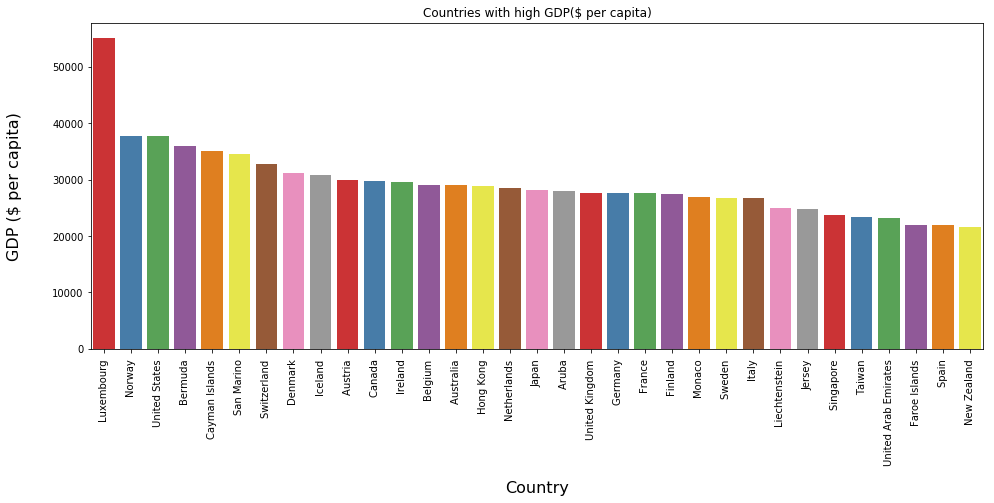

In [16]:
fig, ax = plt.subplots(figsize=(16,6))
sns.barplot(x='Country', y='GDP ($ per capita)', data=top_gdp_countries.head(33), palette='Set1')
ax.set_xlabel(ax.get_xlabel(), labelpad=15)
ax.set_ylabel(ax.get_ylabel(), labelpad=30)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.xticks(rotation=90)

# Add title 
plt.title('Countries with high GDP($ per capita)')
plt.show()

- To display Barplot 'barplot()' function from 'seaborn' library is used.
- The 'subplots()' plots the outer area for other graphs to plot.

- The chart shows 'GDP (per capita)' on X-axis vs country on Y-axis. 

- Luxembourg has highest GDP per capita.


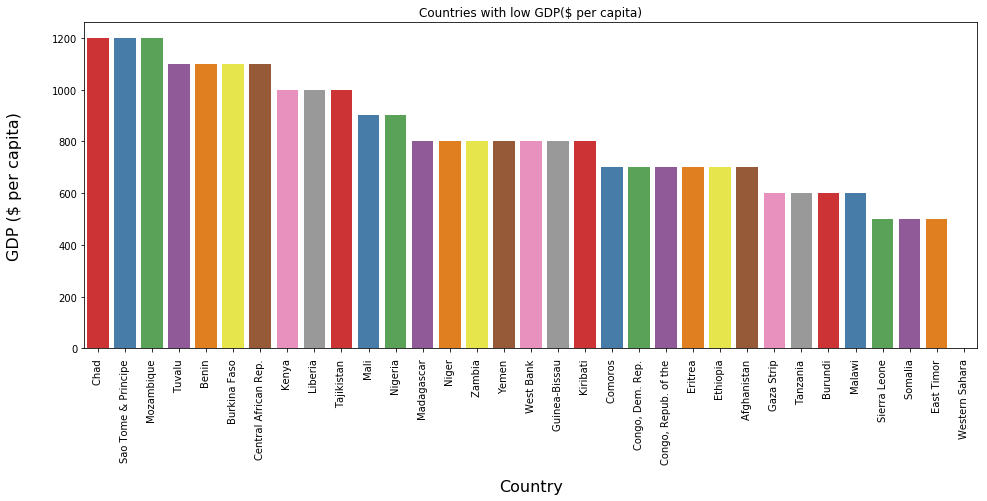

In [17]:
fig, ax = plt.subplots(figsize=(16,6))
sns.barplot(x='Country', y='GDP ($ per capita)', data=top_gdp_countries.tail(33), palette='Set1')
ax.set_xlabel(ax.get_xlabel(), labelpad=15)
ax.set_ylabel(ax.get_ylabel(), labelpad=30)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.xticks(rotation=90)
# Add title 
plt.title('Countries with low GDP($ per capita)')
plt.show()

- On X-axis there are 33 countries which have lowest GDP per capita.
- Here we can infer from graph that max GDP per capita is 1200
    - Which is below average of all 227 countries(i.e. 9689.82)
    - Way below top 20 countries (i.e. 32370.0).


In [18]:
total = df.isnull().sum()[df.isnull().sum() != 0].sort_values(ascending = False)
percent = pd.Series(round(total/len(df)*100,2))
pd.concat([total, percent], axis=1, keys=['total_missing', 'percent'])

,total_missing,percent
Climate,22,9.69
Literacy (%),18,7.93
Industry,16,7.05
Service,15,6.61
Agriculture,15,6.61
Deathrate,4,1.76
Phones (per 1000),4,1.76
Birthrate,3,1.32
Infant mortality (per 1000 births),3,1.32
Net migration,3,1.32



#### In our dataset, out of 20 charecterics 14 have missing values.

In [19]:
# Checking for null values
df.isnull().values.any() 

True

In [20]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

In [21]:
df.isnull().sum().sum()

110

#### Our Dataset is missing 110 values.

## Regions

In [22]:
df.groupby('Region')[['GDP ($ per capita)', 'Literacy (%)', 'Agriculture','Industry','Infant mortality (per 1000 births)']].median().sort_values('GDP ($ per capita)',ascending=False)

,GDP ($ per capita),Literacy (%),Agriculture,Industry,Infant mortality (per 1000 births)
Region,,,,,
NORTHERN AMERICA,29800.0,97.50,0.0100,0.2040,7.540
WESTERN EUROPE,27200.0,99.00,0.0220,0.2450,4.705
BALTICS,11400.0,99.80,0.0400,0.2940,7.870
NEAR EAST,9250.0,83.00,0.0350,0.3520,19.060
EASTERN EUROPE,9100.0,98.60,0.0815,0.3095,9.330
LATIN AMER. & CARIB,6300.0,94.05,0.0700,0.2590,18.050
NORTHERN AFRICA,6000.0,70.00,0.1320,0.3570,31.000
OCEANIA,5000.0,95.00,0.1505,0.1710,12.620
ASIA (EX. NEAR EAST),3450.0,90.60,0.1610,0.2815,30.775


In [23]:
df.groupby('Region')['Country'].nunique()

Region
ASIA (EX. NEAR EAST)                   28
BALTICS                                 3
C.W. OF IND. STATES                    12
EASTERN EUROPE                         12
LATIN AMER. & CARIB                    45
NEAR EAST                              16
NORTHERN AFRICA                         6
NORTHERN AMERICA                        5
OCEANIA                                21
SUB-SAHARAN AFRICA                     51
WESTERN EUROPE                         28
Name: Country, dtype: int64

 - In our Dataset there are 11 regions.

 - NORTHERN AMERICA has highest 'GDP (per capita)' (i.e 9800.0) with high literacy rate of 97.50 and Agriculture of 0.0100.
 - SUB-SAHARAN AFRICA	has lowest 'GDP (per capita)' (i.e 1300.0)	with literacy rate of 62.95 and Agriculture of 0.2760.
 
 - From our analysis we can infer:
     - Country's with high literacy, better Infant mortality (per 1000 births) rate have high GDP (per capita).
     - SUB-SAHARAN AFRICA have lowest GDP (per capita) with low literacy and bad Infant mortality (per 1000 births).     
 

In [24]:
np.random.seed(sum(map(ord, "distributions")))

- The function 'random()' generated data randomly to be used for distributions.
- The function 'seed()' holds this values in kernel.

In [25]:
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


- The function 'head()' displays top 5 rows from dataset.

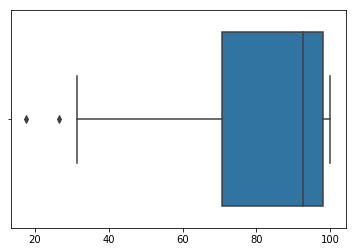

In [26]:
sns.boxplot(np.array(df['Literacy (%)']))

# to Remove <matplotlib.axes._subplots.AxesSubplot at 0x1a60c551e80>
plt.show()

- The function 'Boxplot()' belongs to 'seaborn' library.
- Box plot—displays the five-number summary of a set of data.
- From above boxplot, we can infer that the median value lies around 93.
- Literacy rate have 2 outliers.

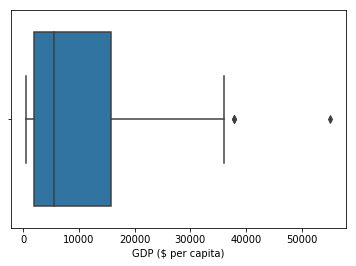

In [27]:
sns.boxplot(df['GDP ($ per capita)'])
plt.show()

- In our dataset GDP per capita lies in between first quartile and median.
- GDP per capita rate have 2 outliers.
- One is extreme ountlier that can affect the analysis.

In [28]:
df.corr()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
Population,1.000000,0.469985,-0.028190,-0.068199,0.000011,0.023003,-0.039324,-0.043481,-0.030819,0.188251,-0.060757,-0.120606,-0.026546,-0.045090,-0.028367,0.000376,0.099333,-0.080852
Area (sq. mi.),0.469985,1.000000,-0.066917,-0.095627,0.047470,-0.007163,0.072185,0.035994,0.053403,-0.079714,-0.143916,0.138974,-0.117134,-0.066423,0.040079,-0.050640,0.121565,-0.054369
Pop. Density (per sq. mi.),-0.028190,-0.066917,1.000000,0.241690,0.178038,-0.144238,0.195773,0.097230,0.280172,-0.081015,-0.031661,0.081859,0.009064,-0.159192,-0.070045,-0.107142,-0.139803,0.248774
Coastline (coast/area ratio),-0.068199,-0.095627,0.241690,1.000000,-0.134145,-0.136577,0.049118,0.117095,0.152129,-0.120772,0.341820,-0.079494,-0.032579,-0.075765,-0.161866,-0.030250,-0.199995,0.196528
Net migration,0.000011,0.047470,0.178038,-0.134145,1.000000,-0.025015,0.382461,-0.008761,0.239601,-0.058170,-0.347968,0.225299,-0.015170,-0.066537,0.033611,-0.116719,-0.026324,0.127134
Infant mortality (per 1000 births),0.023003,-0.007163,-0.144238,-0.136577,-0.025015,1.000000,-0.600774,-0.765536,-0.672312,-0.113859,-0.062366,0.124100,-0.374406,0.845764,0.656338,0.709475,0.003322,-0.633982
GDP ($ per capita),-0.039324,0.072185,0.195773,0.049118,0.382461,-0.600774,1.000000,0.513144,0.834499,0.019768,-0.219229,0.097828,0.340791,-0.650137,-0.201661,-0.586769,-0.028926,0.550216
Literacy (%),-0.043481,0.035994,0.097230,0.117095,-0.008761,-0.765536,0.513144,1.000000,0.601935,0.105021,0.042825,-0.107563,0.392081,-0.790846,-0.393946,-0.609638,0.064733,0.494607
Phones (per 1000),-0.030819,0.053403,0.280172,0.152129,0.239601,-0.672312,0.834499,0.601935,1.000000,0.061022,-0.152420,0.029900,0.402161,-0.724614,-0.260309,-0.601739,-0.152452,0.683934
Arable (%),0.188251,-0.079714,-0.081015,-0.120772,-0.058170,-0.113859,0.019768,0.105021,0.061022,1.000000,0.094361,-0.856763,0.380031,-0.186823,0.053472,-0.034822,-0.063618,0.091126


- #### corr() function compute pairwise correlation of columns, excluding NA/null values.

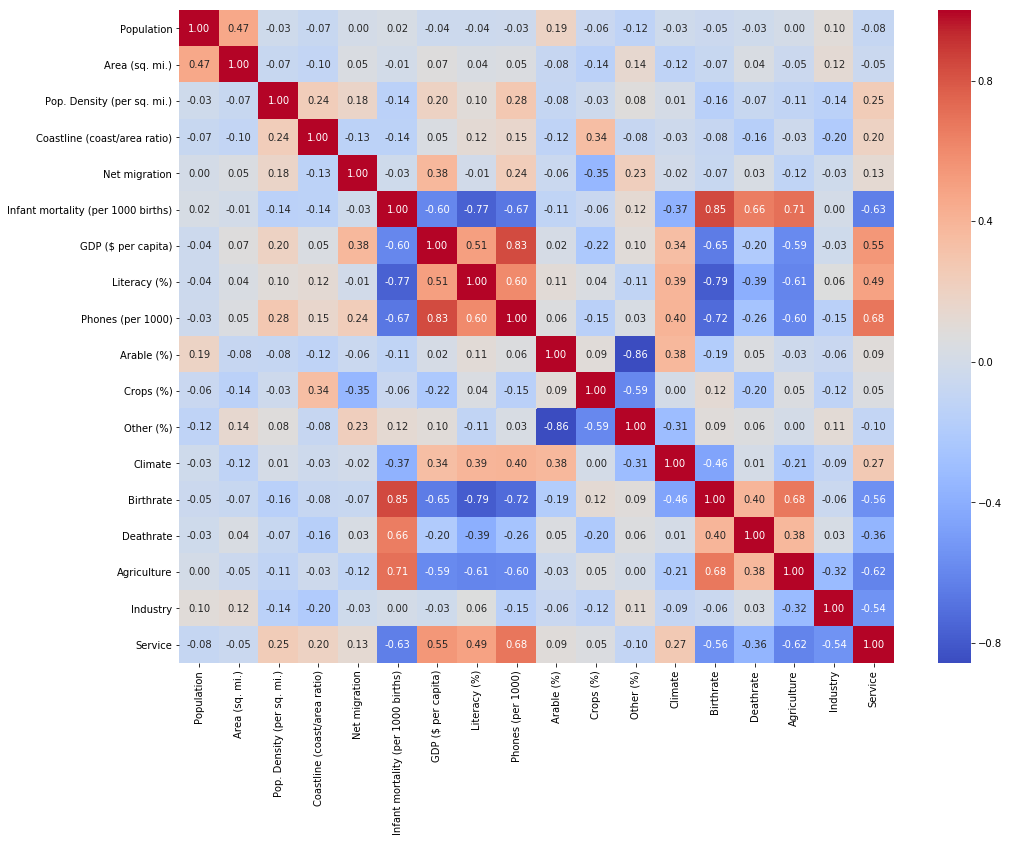

In [29]:
plt.figure(figsize=(16,12))
sns.heatmap(data=df.iloc[:,2:].corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

- Function 'heatmap()' is belong to 'seaborn' library.
- Heatmap plots data in rectangular matrix form in color-code basis.
- In heatmap values above and below digonal metrics line are identical.
- 'literacy','phones_per_1000','infant_mortality_per_1000_births','birthrate','deathrate' have higest absolute value correlation with 'gdp_per_capita'.
- Arable, Population, Area (sq. mi.), Costline have least correlation with 'gdp_per_capita'.

In [30]:
# choose attributes which shows relation
x = df[['GDP ($ per capita)','Literacy (%)','Phones (per 1000)','Service','Infant mortality (per 1000 births)','Birthrate','Deathrate']]

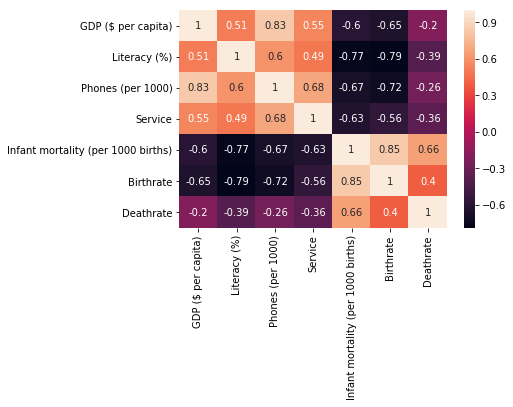

In [31]:
# show corr of the same
sns.heatmap(x.corr(), annot=True)
plt.show()

- #### From heatmap we can infer that:
    - Literacy rate, Phones (per 1000) and Service are positively correlated to GDP per capita.
    - Infant mortality rate, Birthrate and Deathrate are negatively correlated to GDP per capita.
    

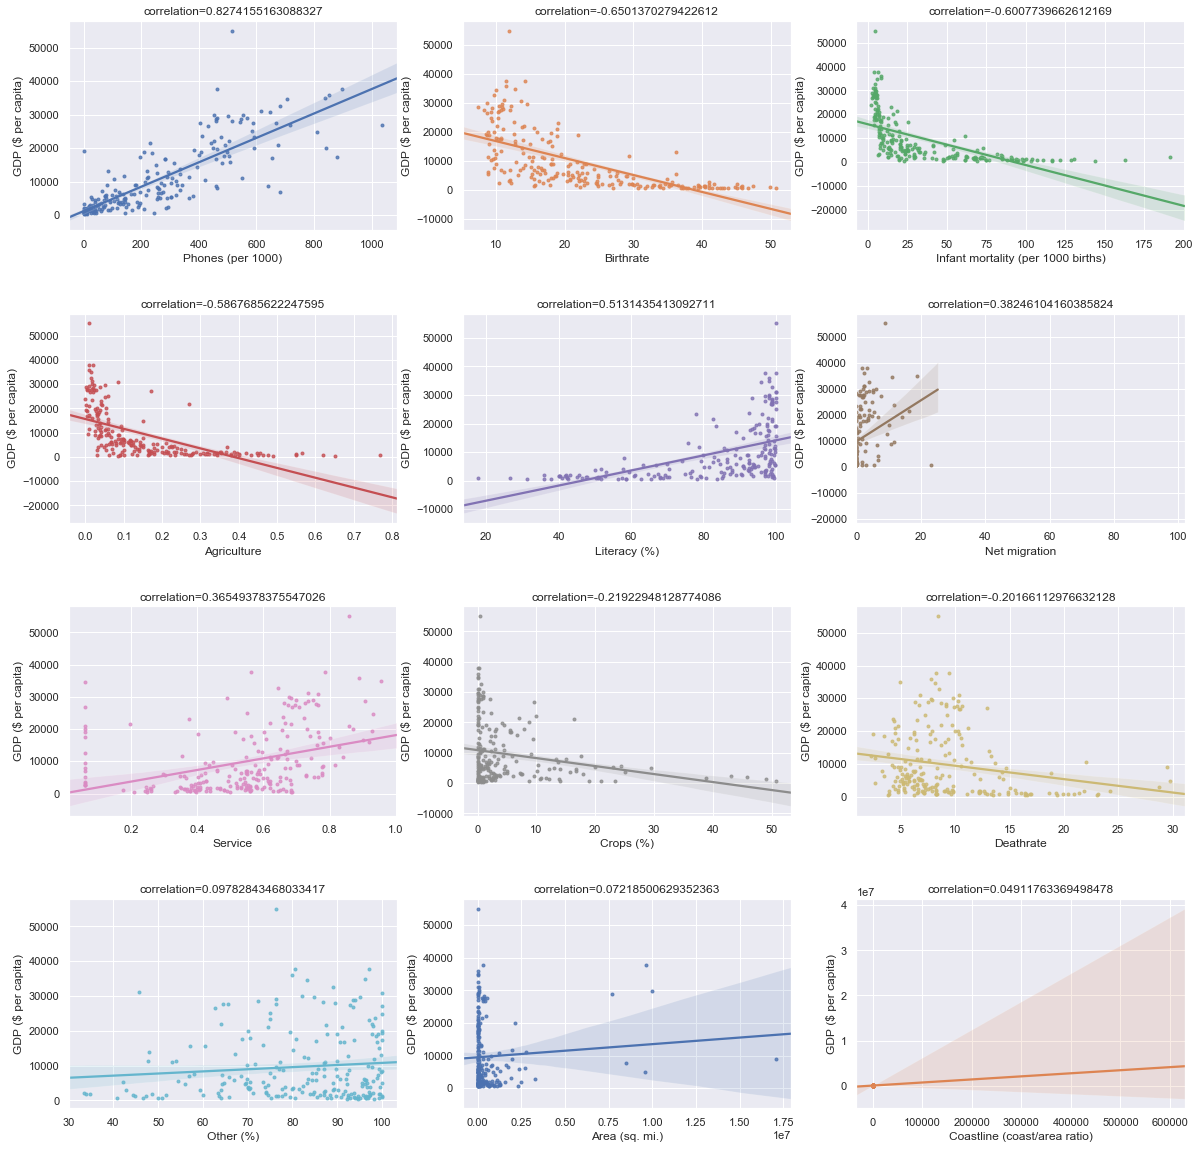

In [48]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20,20))
plt.subplots_adjust(hspace=0.4)

corr_to_gdp = pd.Series()
for col in df.columns.values[2:]:
    if ((col!='GDP ($ per capita)')&(col!='Climate')&(col!='Pop. Density (per sq. mi.)')):
        corr_to_gdp[col] = df['GDP ($ per capita)'].corr(df[col])
        abs_corr_to_gdp = corr_to_gdp.abs().sort_values(ascending=False)
        corr_to_gdp = corr_to_gdp.loc[abs_corr_to_gdp.index]

for i in range(4):
    for j in range(3):
        sns.regplot(x=corr_to_gdp.index.values[i*3+j], y='GDP ($ per capita)', data=df,
                   ax=axes[i,j], fit_reg=True, marker='.')
        title = 'correlation='+str(corr_to_gdp[i*3+j])
        axes[i,j].set_title(title)
axes[1,2].set_xlim(0,102)
plt.show()

- Scatterplot plots the Dependant variable on Y-axis to the Independant Variable on X-axis.

- GDP per capita is dependant variable on Phones per 1000 people, Birthrate, Infant mortality (per 1000 births), Agriculture, Service, Literacy Rate, NEt migration, Crops, DeathRate.   


- From above dot plot graph we can say:
    1. There is a strong, positive, linear association between 'GDP Per Capita' and 'Phones per 1000 people' with 1 outlier and few potential outliers.
    2. 'GDP Per Capita' and 'Birthrate' have moderate, negative, nonlinear association with few outliers.
    3. 'GDP Per Capita' and 'infant mortality rate' have moderate, negative, nonlinear association with 2 extream outliers.
    4. 'GDP Per Capita' and 'Agriculture' have moderate, negative, nonlinear association with 2 extream outliers and few potential outliers.
    5. 'GDP Per Capita' and 'services' have moderate, positive, linear association with lots of outliers.
    6. 'GDP Per Capita' and 'Literacy rate' have moderate, positive, nonlinear association with 1 outlier.
    7. 'GDP Per Capita' and 'Net Migration' have weak association with lots of outlier.
    8. 'GDP Per Capita' and 'Crops rate' have strong, negative, nonlinear association with lots of outliers.
    9. 'GDP Per Capita' and 'DeathRate' have strong, negative, nonlinear association.
    10. 'GDP Per Capita' vs 'Pop. Density (per sq. mi.)' or 'Area (sq. mi.)' or 'Other (%)' or 'Coastline (coast/area ratio)' have very weak correlation with lots of outliers.


    

In [33]:
df.groupby('Region')[['GDP ($ per capita)', 'Phones (per 1000)', 'Service','Industry','Population']].median().sort_values('GDP ($ per capita)',ascending=False)

,GDP ($ per capita),Phones (per 1000),Service,Industry,Population
Region,,,,,
NORTHERN AMERICA,29800.0,683.20,0.7870,0.2040,65773.0
WESTERN EUROPE,27200.0,564.50,0.7200,0.2450,4921096.0
BALTICS,11400.0,321.40,0.6660,0.2940,2274735.0
NEAR EAST,9250.0,211.00,0.5840,0.3520,3488139.5
EASTERN EUROPE,9100.0,296.05,0.5910,0.3095,6412407.5
LATIN AMER. & CARIB,6300.0,222.85,0.6180,0.2590,1065842.0
NORTHERN AFRICA,6000.0,123.60,0.4255,0.3570,21552552.5
OCEANIA,5000.0,118.60,0.6440,0.1710,114689.0
ASIA (EX. NEAR EAST),3450.0,61.50,0.4950,0.2815,26336502.5


### Grouping dataset based on region:
From above table we can infer that:
- Even though NORTHERN AMERICA have industry count as same as SUB-SAHARAN AFRICA it has very less population to serve which in result having more acces to services.
- NORTHERN AMERICA have very high rate of people usning phones (i.e 68% of entire population or ~44936 out of 65773.0 peoples)
- SUB-SAHARAN AFRICA have very less number of people having access to phones (i.e just 0.97% of entire population or ~78473 out of 8090068.0 peoples)


In [34]:
# choose attributes which shows relation
x = df[['GDP ($ per capita)','Phones (per 1000)','Service','Literacy (%)','Infant mortality (per 1000 births)','Crops (%)']]
#colors = {'GDP ($ per capita)':'red', 'Phones (per 1000)':'blue', 'Service':'green', 'Literacy (%)':'pink', 'Infant mortality (per 1000 births)':'orange'}

C:\Users\kaila\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\kaila\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


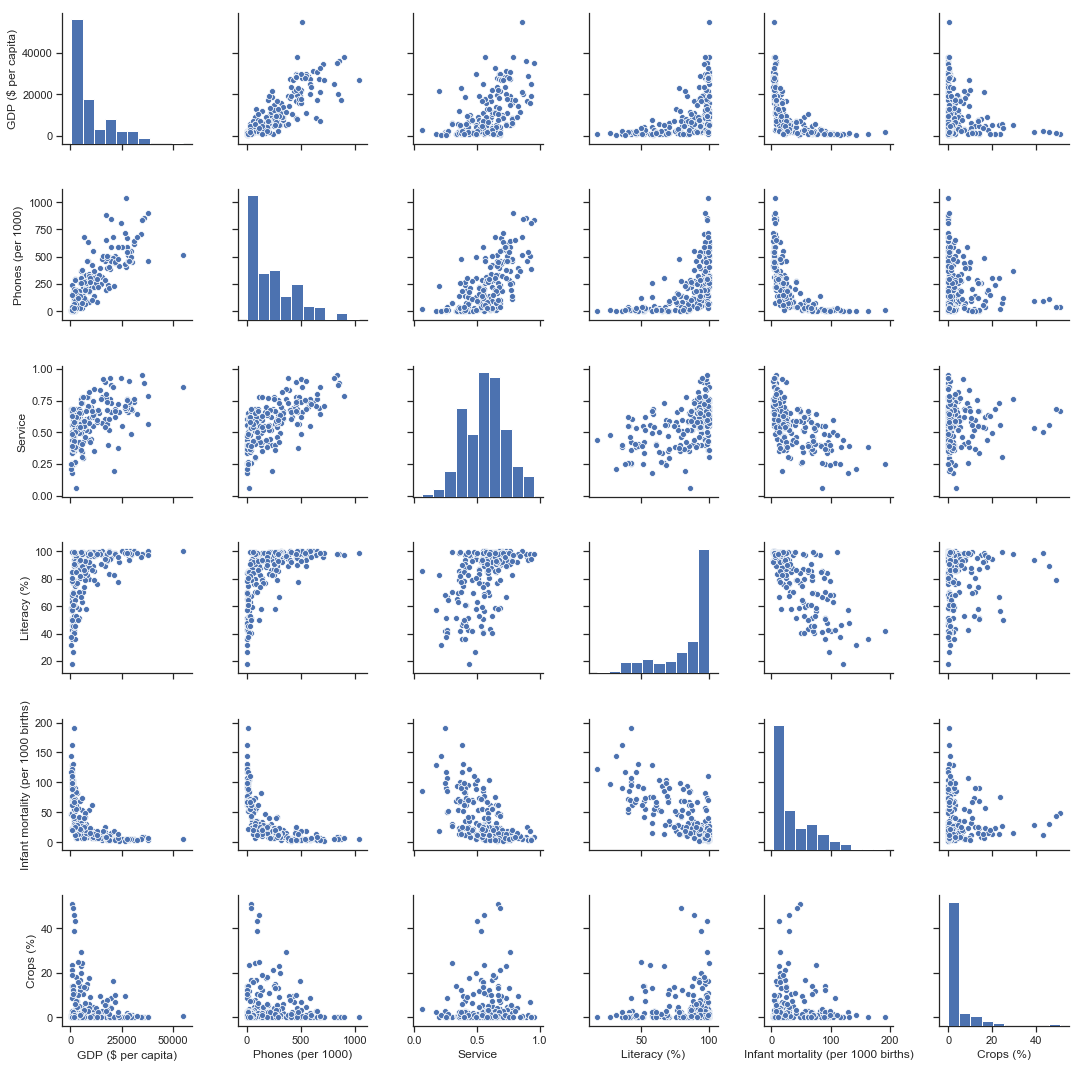

In [35]:
sns.set(style="ticks")
sns.pairplot(x,palette="husl")
plt.show()

- The pairs plot builds on two basic figures, the histogram and the scatter plot.
- The histogram on the diagonal allows us to see the distribution of a single variable while the scatter plots on the upper and lower of diagonal show the relationship between two variables.


- From pairplot we can infer:
    1. GDP Per capita, Phones (per 1000), Infant Mortalty rate, Crops Rate histogram's are Right-Skewed.
    2. Literacy rate histogram is Left Skewed while Service histogram is fairly symmetrical.
    3. Services and Phone (per 1000) people are positively correlated showing that as phones increases the services also increases.
    4. GDP per Capita and Phone (per 1000) have positive correlation as countries income increase more people having access to phones.
    5. As literacy rate increase people are using or buying phones increase.
    6. As Infant mortality rate increase (should be low) country's Literacy rate, services, phone (per 1000) people decrease.
    7. As literacy increase the services also inceases.
    8. Crops rate and GDP per capita are inversely praportional to each other as GDP of country goes up crops rate's goes down.
    

In [36]:
x.corr()

,GDP ($ per capita),Phones (per 1000),Service,Literacy (%),Infant mortality (per 1000 births),Crops (%)
GDP ($ per capita),1.000000,0.834499,0.550216,0.513144,-0.600774,-0.219229
Phones (per 1000),0.834499,1.000000,0.683934,0.601935,-0.672312,-0.152420
Service,0.550216,0.683934,1.000000,0.494607,-0.633982,0.053946
Literacy (%),0.513144,0.601935,0.494607,1.000000,-0.765536,0.042825
Infant mortality (per 1000 births),-0.600774,-0.672312,-0.633982,-0.765536,1.000000,-0.062366
Crops (%),-0.219229,-0.152420,0.053946,0.042825,-0.062366,1.000000


- Phones (per 1000), Service, Literacy Rate have positive correlation.
- Infant mortality (per 1000 births) and crops rate have negative correlation.

In [37]:
df['GDP ($ per capita)']

0        700.0
1       4500.0
2       6000.0
3       8000.0
4      19000.0
5       1900.0
6       8600.0
7      11000.0
8      11200.0
9       3500.0
10     28000.0
11     29000.0
12     30000.0
13      3400.0
14     16700.0
15     16900.0
16      1900.0
17     15700.0
18      6100.0
19     29100.0
20      4900.0
21      1100.0
22     36000.0
23      1300.0
24      2400.0
25      6100.0
26      9000.0
27      7600.0
28     16000.0
29     18600.0
        ...   
197     3300.0
198    23400.0
199     1000.0
200      600.0
201     7400.0
202     1500.0
203     2200.0
204     9500.0
205     6900.0
206     6700.0
207     5800.0
208     9600.0
209     1100.0
210     1400.0
211     5400.0
212    23200.0
213    27700.0
214    37800.0
215    12800.0
216     1700.0
217     2900.0
218     4800.0
219     2500.0
220    17200.0
221     3700.0
222      800.0
223        NaN
224      800.0
225      800.0
226     1900.0
Name: GDP ($ per capita), Length: 227, dtype: float64

In [38]:
gdp_no_nan= df['GDP ($ per capita)'][~np.isnan(df['GDP ($ per capita)'])]
gdp_no_nan

0        700.0
1       4500.0
2       6000.0
3       8000.0
4      19000.0
5       1900.0
6       8600.0
7      11000.0
8      11200.0
9       3500.0
10     28000.0
11     29000.0
12     30000.0
13      3400.0
14     16700.0
15     16900.0
16      1900.0
17     15700.0
18      6100.0
19     29100.0
20      4900.0
21      1100.0
22     36000.0
23      1300.0
24      2400.0
25      6100.0
26      9000.0
27      7600.0
28     16000.0
29     18600.0
        ...   
196    32700.0
197     3300.0
198    23400.0
199     1000.0
200      600.0
201     7400.0
202     1500.0
203     2200.0
204     9500.0
205     6900.0
206     6700.0
207     5800.0
208     9600.0
209     1100.0
210     1400.0
211     5400.0
212    23200.0
213    27700.0
214    37800.0
215    12800.0
216     1700.0
217     2900.0
218     4800.0
219     2500.0
220    17200.0
221     3700.0
222      800.0
224      800.0
225      800.0
226     1900.0
Name: GDP ($ per capita), Length: 226, dtype: float64

- The function '.isnan()'  belong to 'numpy' library.
- isnan() test element-wise for NaN and return result as a boolean array.
- We will use this result to plot distplot.

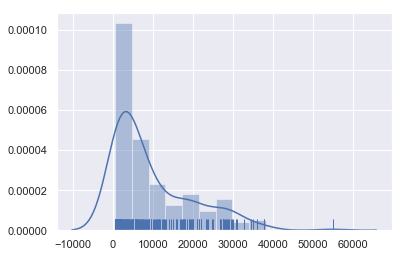

In [39]:
sns.set(color_codes=True)
sns.distplot(np.array(gdp_no_nan),rug=True)
plt.show()

Distplot are drawn usning '.distplot()' function which belong to 'seaborn' library.
Distplot takes series or array's of data  rather than enitr dataset.
Shows histogram and KDE (Kernel Density Estimation) together.

- Distplot shows GDP per capita excluding rows which has NaN values.
- KDE shows distribtion curve with outliers at right side.


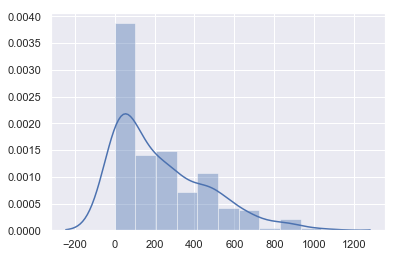

In [40]:
#checking distribution of literacy of the world
#sns.distplot(np.array(df['Phones (per 1000)']))

# Citation : https://stackoverflow.com/questions/47333227/pandas-valueerror-cannot-convert-float-nan-to-integer
#For identifying NaN values 
df[df['Phones (per 1000)'].isnull()]

#Replace Non numeric values to NAN and then change NAN values to 0.20 which is mean value for column 'Phones (per 1000)'
df['Phones (per 1000)'] = pd.to_numeric(df['Phones (per 1000)'], errors='coerce').fillna(0.20)
#To remove all rows with NaNs in column Phones (per 1000) to avoid Type casting error.
#df = df.dropna(subset=['Phones (per 1000)'])

#Convert alues to Int datatype.
#df['Phones (per 1000)'] = df['Phones (per 1000)'].astype(int)

#df['Phones (per 1000)']
sns.distplot(np.array(df['Phones (per 1000)']))
plt.show()

- The '.isnull()' function is used to check for NAN values.
- The function '.to_numeric()' is to convert non numeric values to NAN.
- The '.fillna(0.20)' function replace or fill NAN values with mean value of column 'Phones (per 1000)' for better analysis of data.
- KDE shows distribution curve with outliers at right side.

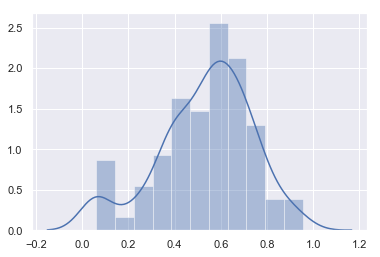

In [50]:
#For identifying NaN values 
df[df['Service'].isnull()]
#Replace Non numeric values to NAN and then change NAN values to 0.062 which is mean value for column 'Service'.
df['Service'] = pd.to_numeric(df['Service'], errors='coerce').fillna(0.062)
#df = df.dropna(subset=['Service'])
#df['Service'] = df['Service'].astype(float)
#df['Service'] 
sns.distplot(np.array(df['Service']))
plt.show()

- The '.isnull()' function is used to check for NAN values.
- The function '.to_numeric()' is to convert non numeric values to NAN.
- The '.fillna(0.062)' function replace or fill NAN values with mean value of column 'Service' for better analysis of data.

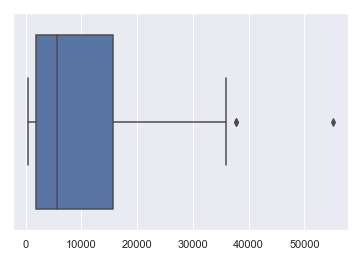

In [42]:
sns.boxplot(np.array(df['GDP ($ per capita)']))
plt.show()

- Boxplot for GDP per Capita lies in between first quartile and median.
- Boxplot has 2 outliers.

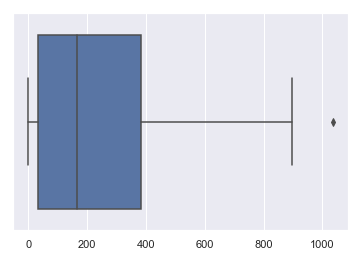

In [43]:
sns.boxplot(np.array(df['Phones (per 1000)']))
plt.show()

- For our series of data the 'Phones (per 1000)' lies under 400 which is greater than mean and third quartile average of all countries.
- The boxplot for 'Phones (per 1000)' has one extream outlier.

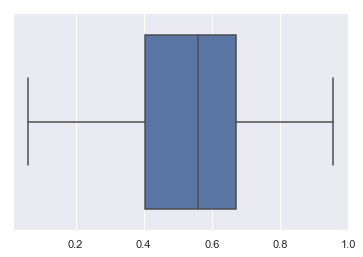

In [44]:
sns.boxplot(np.array(df['Service']))
plt.show()

- Range for the 'service' is 0.5 to 0.9
- For our series of data, the interquartile range lies between 0.4 to o.7
- The plot has no outliers.

## Conclusion

#### From our Exploratory Data Analysis (EDA) on factors affecting Countr's GDP per capita we can conclude that:
- 'Country's GDP per capita' is highly correlated to 'Phones per 1000 people'.
- 'Country's GDP per capita' is directly related to 'Literacy rate', as 'Literacy' increase 'country's GDP per capita' grows.
- When 'Infant mortality rate' decrease, 'Country's GDP per capita' increse.
- When 'Birthrate' decrease the 'Country's GDP per capita' increse. As there are less people to devide the countries GDP per capita.
- 'Service' and 'Mobile per 1000 people' rate are dicrectly related to 'Country's GDP per capita' as higher the GDP higher the number of people using phones and services.
- When Deathrate decrease the 'Country's GDP per capita' grows.
- 'Agriculture' plays moderate role in countries growth of 'GDP per capita' while 'Coastline', 'Arable' and 'Climate' have very less role to play in Country's GDP per capita growth.



## Contributions 

In above analysis:
- 60% of code and data are given by prof. Nik Brown.
- 20% of resource is from web and citations are given below.
- 20% of explanation, analysis and code is done by me.

## Citations

-  https://www.cia.gov/library/publications/the-world-factbook/docs/faqs.html
-  https://www.kaggle.com/stieranka/predicting-gdp-world-countries/data
-  https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15
-  https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166
-  https://www.dummies.com/education/math/statistics/how-to-identify-skew-and-symmetry-in-a-statistical-histogram/
-  https://stackoverflow.com/questions/47333227/pandas-valueerror-cannot-convert-float-nan-to-integer
-  https://seaborn.pydata.org/tutorial/distributions.html
-  https://www.youtube.com/watch?v=2gUzVX2yfWA
-  https://seaborn.pydata.org/generated/seaborn.heatmap.html
-  https://www.youtube.com/results?search_query=what+is+distplot+seaborn
-  https://www.khanacademy.org/math/ap-statistics/bivariate-data-ap/scatterplots-correlation/a/describing-scatterplots-form-direction-strength-outliers
-  https://opensource.org/licenses/MIT

##  License

#### Copyright 2019 Kailash Nadkar


Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.